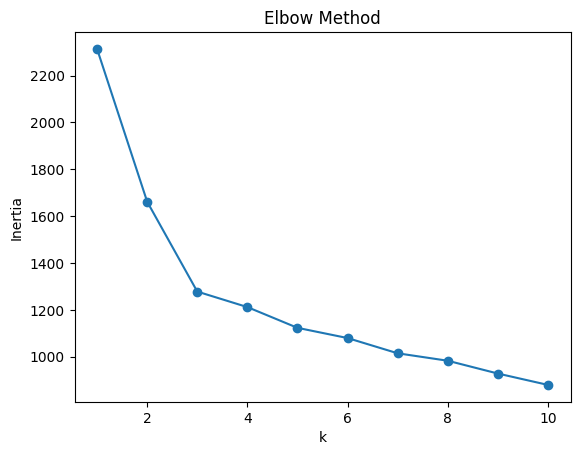

Silhouette Score for KMeans (k=3): 0.2849


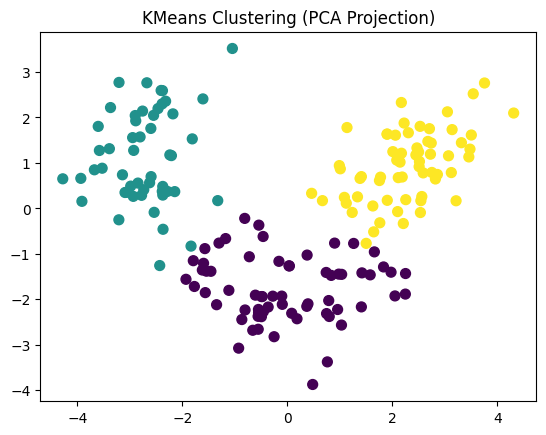

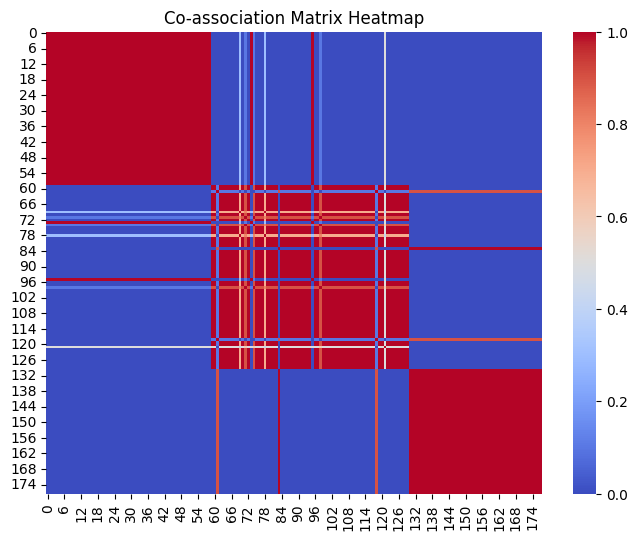

Silhouette Score for Ensemble: 0.2859


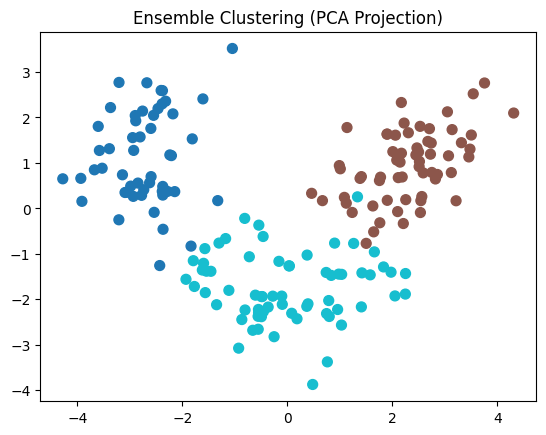

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
import seaborn as sns


data = load_wine()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(K_range, inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

chosen_k = 3

kmeans = KMeans(n_clusters=chosen_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
sil_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f'Silhouette Score for KMeans (k={chosen_k}): {sil_kmeans:.4f}')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering (PCA Projection)')
plt.show()


n_base_clusterings = 10
base_labels = []

for seed in range(n_base_clusterings):
    km = KMeans(n_clusters=chosen_k, random_state=seed)
    labels = km.fit_predict(X_scaled)
    base_labels.append(labels)

n_samples = X.shape[0]
coassoc_matrix = np.zeros((n_samples, n_samples))

for labels in base_labels:
    for i in range(n_samples):
        for j in range(n_samples):
            if labels[i] == labels[j]:
                coassoc_matrix[i, j] += 1

coassoc_matrix /= n_base_clusterings

plt.figure(figsize=(8, 6))
sns.heatmap(coassoc_matrix, cmap='coolwarm')
plt.title('Co-association Matrix Heatmap')
plt.show()

ensemble = SpectralClustering(n_clusters=chosen_k, affinity='precomputed', random_state=42)
ensemble_labels = ensemble.fit_predict(coassoc_matrix)
sil_ensemble = silhouette_score(X_scaled, ensemble_labels)
print(f'Silhouette Score for Ensemble: {sil_ensemble:.4f}')

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ensemble_labels, cmap='tab10', s=50)
plt.title('Ensemble Clustering (PCA Projection)')
plt.show()
